# WeatherPy
----

#### Analysis
    As expected, the cities closest to the equator are the warmest. However, distance from the equator does not seem to 
    have an impact on clousiness, humidity, or wind speed this time of year. All 3 vary greatly all the range of 
    distances. Further analysis during other seasons would provide a more comprehensive picture of the impact of 
    longitude and latitude on the weather.  


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Get weather data
url= "http://api.openweathermap.org/data/2.5/weather?"
units= "imperial"
query_url= f"{url}appid={api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": 147.06,
        "lat": -42.78
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 52.84,
        "pressure": 1016,
        "humidity": 71,
        "temp_min": 48.99,
        "temp_max": 57.2
    },
    "visibility": 10000,
    "wind": {
        "speed": 12.75,
        "deg": 360
    },
    "clouds": {
        "all": 75
    },
    "dt": 1561747745,
    "sys": {
        "type": 1,
        "id": 9545,
        "message": 0.0065,
        "country": "AU",
        "sunrise": 1561758203,
        "sunset": 1561790791
    },
    "timezone": 36000,
    "id": 2155415,
    "name": "New Norfolk",
    "cod": 200
}


In [5]:
#Setup lists to hold response info
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

processing_record = 1

print(f"Beginning Data Retrieval")
print(f"------------------------------")

#loop through list of cities and request data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue
    
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")
        

Beginning Data Retrieval
------------------------------
Processing Record 1 | Tura
Processing Record 2 | Novaci
City not found. Skipping...
Processing Record 3 | Atuona
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 4 | Mataura
Processing Record 5 | Hay River
Processing Record 6 | Kavieng
Processing Record 7 | Flinders
Processing Record 8 | Fuxin
Processing Record 9 | Khandyga
Processing Record 10 | Bud
Processing Record 11 | Kichera
Processing Record 12 | Shingu
Processing Record 13 | East London
City not found. Skipping...
Processing Record 14 | Dikson
Processing Record 15 | Zhigansk
Processing Record 16 | Ust-Nera
Processing Record 17 | Punta Arenas
Processing Record 18 | Airai
Processing Record 19 | Bluff
Processing Record 20 | Lebanon
Processing Record 21 | Gazli
City not found. Skipping...
Processing Record 22 | Cape Town
Processing Record 23 | Rikitea
Processing Record 24 | Burnie
Processing Record 25 | Roquetas de Mar
Proce

Processing Record 230 | Oranjemund
Processing Record 231 | Aldan
Processing Record 232 | Micheweni
Processing Record 233 | Loandjili
Processing Record 234 | Saurimo
Processing Record 235 | Tevaitoa
Processing Record 236 | Uglegorsk
Processing Record 237 | Naze
Processing Record 238 | Ixtapa
Processing Record 239 | Upernavik
Processing Record 240 | Guerrero Negro
Processing Record 241 | North Platte
Processing Record 242 | Ginda
Processing Record 243 | Rodas
Processing Record 244 | Port Blair
Processing Record 245 | Deputatskiy
Processing Record 246 | Esil
Processing Record 247 | Mar del Plata
Processing Record 248 | Tremedal
Processing Record 249 | Boca do Acre
Processing Record 250 | Senno
City not found. Skipping...
Processing Record 251 | Seoul
Processing Record 252 | Mpulungu
Processing Record 253 | Bonavista
Processing Record 254 | Skelleftea
Processing Record 255 | Diamantino
Processing Record 256 | Amapa
Processing Record 257 | Narasannapeta
Processing Record 258 | Dolores
Proce

Processing Record 455 | Salinas
Processing Record 456 | Saint-Francois
City not found. Skipping...
Processing Record 457 | Koslan
City not found. Skipping...
Processing Record 458 | Demirci
Processing Record 459 | Rocha
Processing Record 460 | Nizhniy Lomov
Processing Record 461 | Constitucion
Processing Record 462 | Cherskiy
Processing Record 463 | Vao
Processing Record 464 | Kerema
Processing Record 465 | Port Lincoln
Processing Record 466 | Kungurtug
Processing Record 467 | Orocue
Processing Record 468 | Charlestown
Processing Record 469 | Kavaratti
Processing Record 470 | Grindavik
Processing Record 471 | Panzhihua
Processing Record 472 | Kayes
Processing Record 473 | Leshukonskoye
Processing Record 474 | Menongue
Processing Record 475 | Severo-Kurilsk
Processing Record 476 | Boguchany
City not found. Skipping...
Processing Record 477 | Ballina
Processing Record 478 | Bredy
Processing Record 479 | Kasongo
Processing Record 480 | Sao Filipe
Processing Record 481 | Ambon
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
city_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

city_data = pd.DataFrame(city_data)
city_data.count()

City               558
Country            558
Date               558
Latitude           558
Longitude          558
Max Temperature    558
Humidity           558
Cloudiness         558
Wind Speed         558
dtype: int64

In [17]:
city_data.head()
city_data.to_csv("city_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

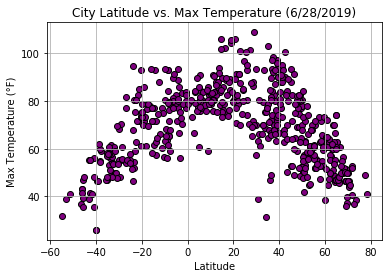

In [30]:
plt.scatter(city_data["Latitude"], city_data["Max Temperature"], facecolors="purple", marker="o", edgecolor="black")

plt.title("City Latitude vs. Max Temperature (6/28/2019)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Images/City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()

#### Latitude vs. Humidity Plot

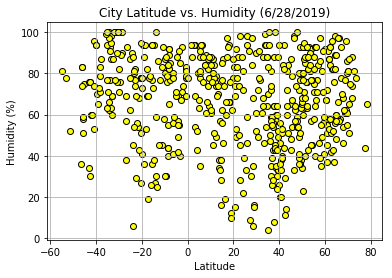

In [31]:
plt.scatter(city_data["Latitude"], city_data["Humidity"], facecolors="yellow", marker="o", edgecolor="black")

plt.title("City Latitude vs. Humidity (6/28/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Images/City Latitude vs Humidity.png")

# Show Plot
plt.show()

#### Latitude vs. Cloudiness Plot

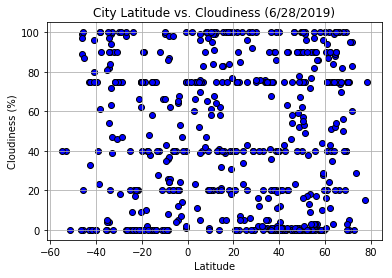

In [32]:
plt.scatter(city_data["Latitude"], city_data["Cloudiness"], facecolors="blue", marker="o", edgecolor="black")

plt.title("City Latitude vs. Cloudiness (6/28/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Images/City Latitude vs Cloudiness.png")

# Show Plot
plt.show()

#### Latitude vs. Wind Speed Plot

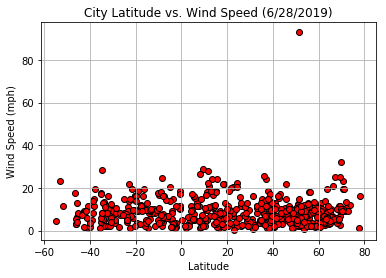

In [33]:
plt.scatter(city_data["Latitude"], city_data["Wind Speed"], facecolors="red", marker="o", edgecolor="black")

plt.title("City Latitude vs. Wind Speed (6/28/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Images/City Latitude vs Wind Speed.png")

# Show Plot
plt.show()